# Capstone Project Report: Predicting California House Prices

## Introduction

The real estate market in California is highly dynamic and influenced by various economic, social, and environmental factors. With rapidly fluctuating property values, it becomes increasingly challenging for stakeholders to make informed decisions. Accurately predicting housing prices is essential for real estate investors, developers, city planners, and potential homebuyers. This report presents an end-to-end machine learning project aimed at developing a robust predictive model to estimate housing prices in California, leveraging the California Housing Prices dataset.

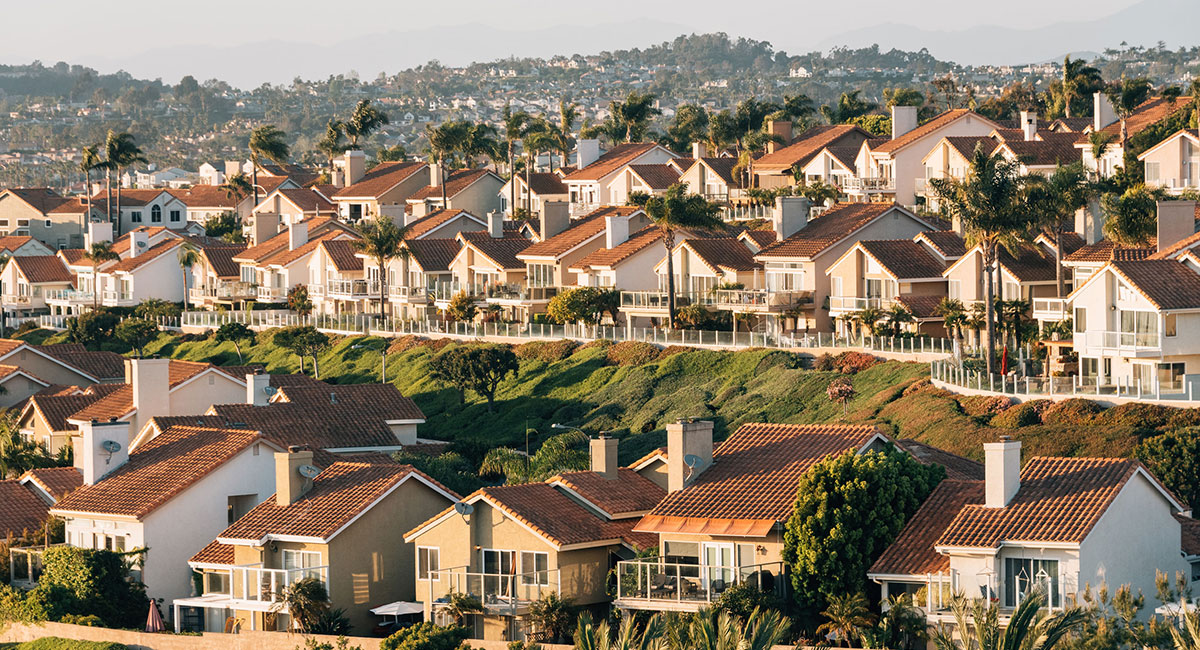

In [85]:
from IPython import display
display.Image('cahomes.jpg')

### Problem Statement

The California real estate market exhibits significant variability in housing prices, driven by a complex interplay of factors such as location, population growth, and proximity to amenities. Traditional methods for estimating housing prices often fail to account for the full range of these variables, leading to inaccuracies that can result in substantial financial losses and inefficiencies for key stakeholders, including investors, city planners, and potential homeowners. To address these challenges, there is a critical need for the development of accurate prediction models and comprehensive analyses that can provide a deeper understanding of the factors influencing housing prices, leading to more precise and reliable estimates.



### Objective

To address these challenges, the goal is to develop a data-driven predictive model that leverages machine learning techniques to estimate housing prices with greater accuracy. This model aims to reduce the prediction error compared to traditional methods, thereby improving decision-making efficiency and reducing costs for stakeholders in the California real estate market.



### Project Overview

In this capstone project, we developed a machine learning model to predict house prices in California using the California Housing Prices dataset from Kaggle. This project encompassed data collection, data preparation, exploratory data analysis (EDA), feature engineering, model training, evaluation, and interpretation. The goal was to build an accurate predictive model that can estimate house prices based on various features.


## Data Collection and Preparation

In [1]:
# Import the necessary librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Dataset Description

The dataset used in this project is the California Housing Prices dataset from Kaggle, which is based on data from the 1990 census. It includes features such as the median income, house age, total rooms, total bedrooms, population, households, and median house value. The target variable in this dataset is median_house_value, which we aim to predict.



### How The Data Was Collected

The dataset has been downloaded from Kaggle into a desktop folder which was later loaded into pandas dataframe for analysis.

In [2]:
# Path to the dataset
path ='housing.csv'

In [3]:
# Load the dataset into a dataframe
housing = pd.read_csv(path)

In [4]:
# Display the shape of the dataset
housing.shape

(20640, 10)

The dataset contains 20,640 rows and 10 columns.

In [5]:
# Display the first five records
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# Display the last five records
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


The first few records give us a glimpse of the data structure, including the geographic coordinates (`longitude`, `latitude`), housing attributes (`housing_median_age`, `total_rooms`, etc.), and the target variable (`median_house_value`).


In [7]:
# Dataset Summary
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The dataset consists of 9 numeric columns and 1 categorical column (ocean_proximity).

In [8]:
# Display the column names in the DataFrame
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [9]:
# Check the count of missing values in each column
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Only the total_bedrooms feature has 207 missing values.

In [10]:
# Print the rows with missing values to see if there is a pattern
nan_df = housing[housing.total_bedrooms.isna()]
nan_df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2826,-119.11,35.42,52.0,154.0,NaN,37.0,16.0,10.0263,200000.0,INLAND
5678,-118.30,33.72,35.0,2790.0,NaN,1167.0,441.0,6.2028,361500.0,NEAR OCEAN
14986,-117.03,32.73,34.0,2061.0,NaN,1169.0,400.0,3.5096,142000.0,NEAR OCEAN
6052,-117.76,34.04,34.0,1914.0,NaN,1564.0,328.0,2.8347,115800.0,INLAND
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN
16038,-122.46,37.72,39.0,2254.0,NaN,1388.0,404.0,2.9688,232000.0,NEAR OCEAN
17639,-121.90,37.28,26.0,3756.0,NaN,1408.0,535.0,5.6427,320000.0,<1H OCEAN
7806,-118.09,33.89,42.0,991.0,NaN,717.0,219.0,4.0926,164400.0,<1H OCEAN
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY


**Observation**: The missing values appear to be random.

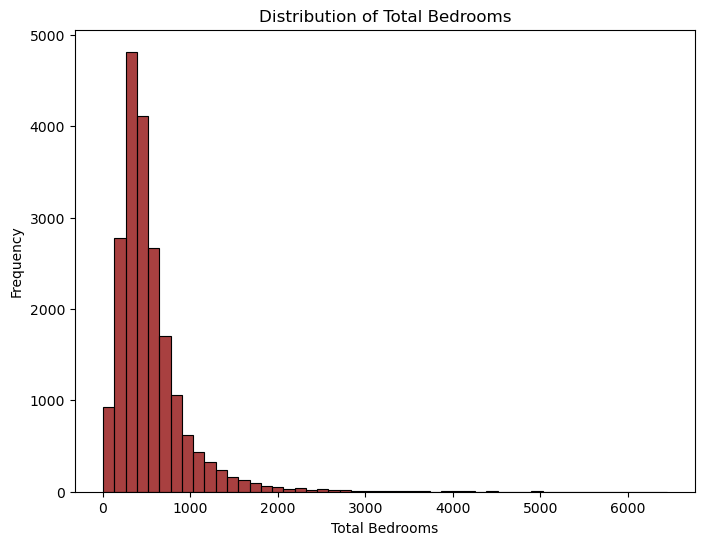

In [11]:
# Visualize the destribution of total_bedrooms to decide on how to hanlde the missing values

# Set the size of the figure
plt.figure(figsize=(8, 6))

# Create a histogram of the 'total_bedrooms' feature
sns.histplot(data=housing, x='total_bedrooms', color='darkred', bins=50)

# Add labels and title
plt.title('Distribution of Total Bedrooms')
plt.xlabel('Total Bedrooms')
plt.ylabel('Frequency')

# Display the plot
plt.show()

The distribution of total_bedrooms is right skewed, indicating the presence of outliers.

In [12]:
# Fill the missing values with the median because it is not prone to outliers
bedroom_median = housing.total_bedrooms.median()
housing = housing.fillna(bedroom_median)

In [13]:
# Verify that there are no missing values left
missing_values_left = housing.isnull().sum()
print(missing_values_left)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


**Observation**: All missing values in total_bedrooms have been filled with the median value.

In [14]:
# Check for duplicate
housing.duplicated().sum()

0

This indicates that there are no duplicate in the dataframe.

In [15]:
# Check the unique values in the ocean_proximity feature for inconsistency
housing.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [16]:
# Convert ocean_proximity to categorical values
housing['ocean_proximity'] = pd.Categorical(housing['ocean_proximity'], ordered=True)
housing['ocean_proximity'].dtype

CategoricalDtype(categories=['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], ordered=True)

The ocean_proximity feature has been converted to a categorical type, preparing it for further analysis.

## Exploratory Data Analysis (EDA)

This analysis will be based on the median_income,housing_median_age, total_rooms and population. This is driven by the objective of understanding the factors that influence housing prices and the dynamics within the housing market.

**Choosing these features is driven by their relevance to understanding key factors that affect housing prices**:

- **Median Income**: Median income is a crucial economic indicator that influences buying power. Higher median income often corresponds to higher purchasing power, which can drive up housing prices. Analyzing the relationship between median_income and housing prices helps us understand the impact of economic factors on real estate values.

- **Housing Median Age**: The age of a house can have a significant impact on its value. Generally, older homes might require more maintenance and could be perceived as less desirable compared to newer homes, which might have modern features and better condition. Analyzing the housing_median_age helps us understand how the age of houses influences their market value.

- **Population**: The population size of an area is a crucial factor in understanding the demand for housing. Larger populations can indicate higher demand for residential properties, which can influence housing prices. Analyzing the population feature helps us assess how demand in different regions impacts housing values.

#### Conduct exploratory data analysis to understand the distribution of features and the target variable (house prices)

In [17]:
# Descriptive Statistics
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Observation**: The mean median_house_value is approximately \\$206,855, with a standard deviation of $115,395. The data exhibits a maximum value of \\$500,001, indicating a potential cap on the housing prices.


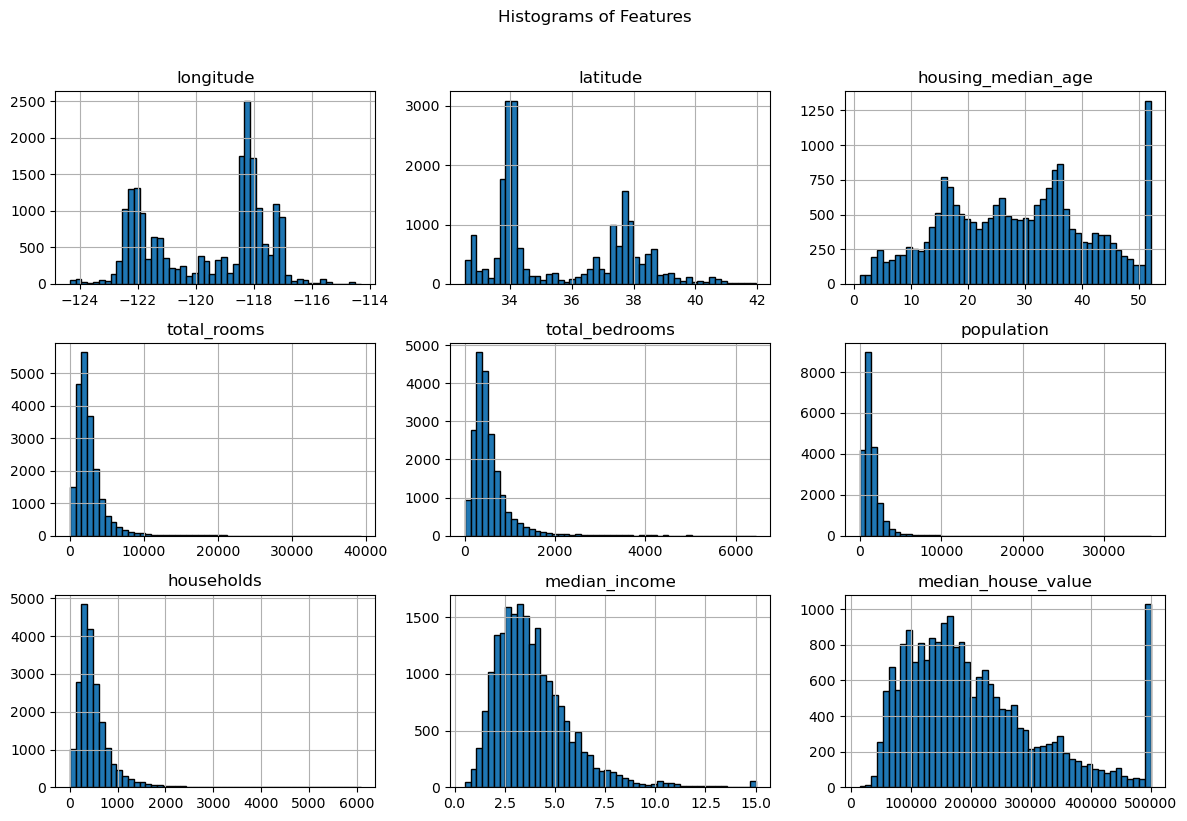

In [18]:
# Distribution of all numerical features in the housing dataset
# Bins are set to 50 and edges of the bars are colored black
housing.hist(bins=50, edgecolor='black', figsize=(12, 8))

# Set a title for the entire plot and adjust its position
plt.suptitle('Histograms of Features', y=1.02)

# Automatically adjust subplot parameters to give some padding
plt.tight_layout()

# Display the plot
plt.show()


In [19]:
# Count the frequency of each value in the ocean_proximity column
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

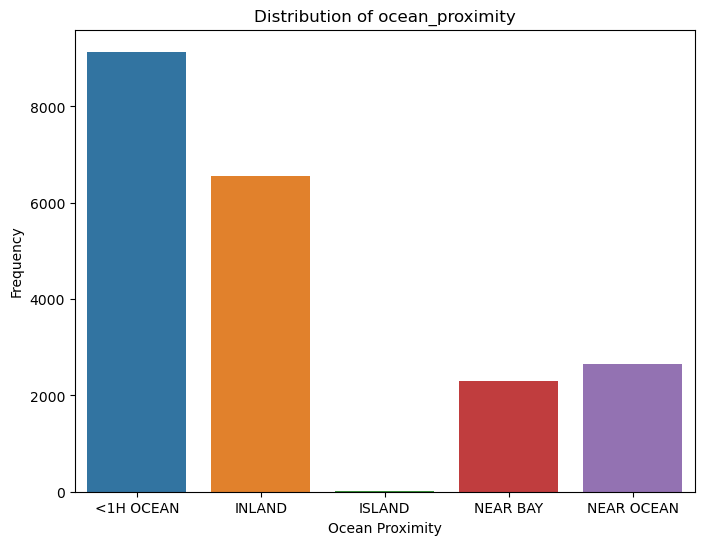

In [20]:
# Distribution of the categorical feature
# create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Countplot of the ocean_proximity column
sns.countplot(housing, x='ocean_proximity')

# Add labels and title
plt.xlabel('Ocean Proximity')
plt.ylabel('Frequency')
ax.set_title('Distribution of ocean_proximity')

# Display the plot
plt.show()

#### Distribution of Numerical Features
The distribution of the features reveals that certain variables are affected by outliers. Specifically, the target variable and predictor variables such as total_rooms, total_bedrooms, population, and household are right-skewed. Although the column median_income is also affected, the impact is less significant. The target has a noticeable cap at $500,000, indicating that the data may have been capped at this value.This will be taken into account when selecting a regression model.

#### Distribution of Categorical Feature (ocean_proximity)
The ocean_proximity distribution shows that most locations are within an hour's travel from the ocean, highlighting a strong preference for coastal areas. There is also a significant number of locations that are inland, indicating a notable portion of the data is situated away from the coast. While locations near the ocean and near bays are present, they are less common compared to those closer to the ocean. Island locations are extremely rare.

In [21]:
# Compute the correlation matrix for numerical features in the 'housing' DataFrame
housing.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000


#### Visualize the relationships between features and the target variable using scatter plots, histograms, and box plots.

#### Hypothesis:
Higher median income and promixity to the ocean leads to higher housing prices. There is increase in the prices of residential properties in areas with higher median income of households and the effect of median_income on housing prices is more pronounced in areas closer to the ocean.

In [22]:
# Subset the dataframe
income_proximity = housing[['median_income', 'ocean_proximity', 'median_house_value']].copy()
income_proximity.head()

,median_income,ocean_proximity,median_house_value
0,8.3252,NEAR BAY,452600.0
1,8.3014,NEAR BAY,358500.0
2,7.2574,NEAR BAY,352100.0
3,5.6431,NEAR BAY,341300.0
4,3.8462,NEAR BAY,342200.0


In [23]:
# Statistical summary to show the distribution of the selected features
income_proximity.describe(include='all')

,median_income,ocean_proximity,median_house_value
count,20640.000000,20640,20640.000000
unique,NaN,5,NaN
top,NaN,<1H OCEAN,NaN
freq,NaN,9136,NaN
mean,3.870671,NaN,206855.816909
std,1.899822,NaN,115395.615874
min,0.499900,NaN,14999.000000
25%,2.563400,NaN,119600.000000
50%,3.534800,NaN,179700.000000
75%,4.743250,NaN,264725.000000


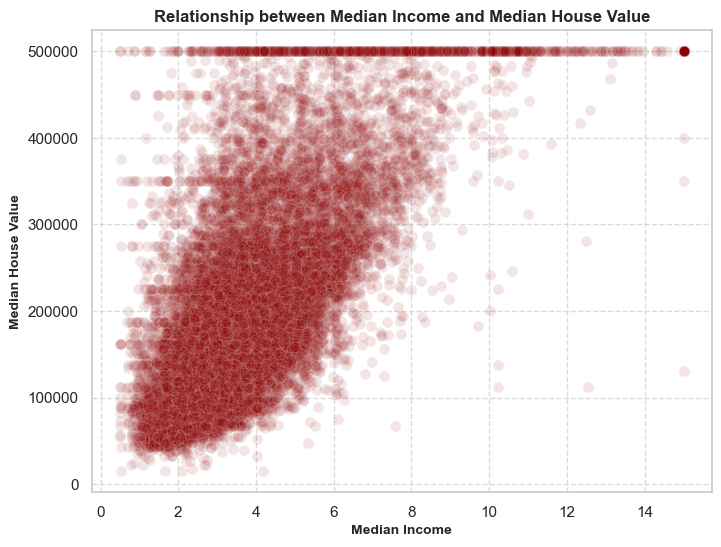

In [24]:
# Create a scatter plot to visualize the relationship between 'median_income' and 'median_house_value'

# Set the style of the plot for better appearance
sns.set(style="whitegrid")

# Set the figure size for better readability
plt.figure(figsize=(8, 6))  

# Create the scatter plot
sns.scatterplot(data=income_proximity, x='median_income', y='median_house_value', alpha=0.1, s=60, color='darkred')

# Add a title with a larger font size and bold weight
plt.title("Relationship between Median Income and Median House Value", fontsize=12, weight='bold')

# Label the x and y axes with larger font size and bold weight
plt.xlabel('Median Income', fontsize=10, weight='bold')
plt.ylabel('Median House Value', fontsize=10, weight='bold')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()


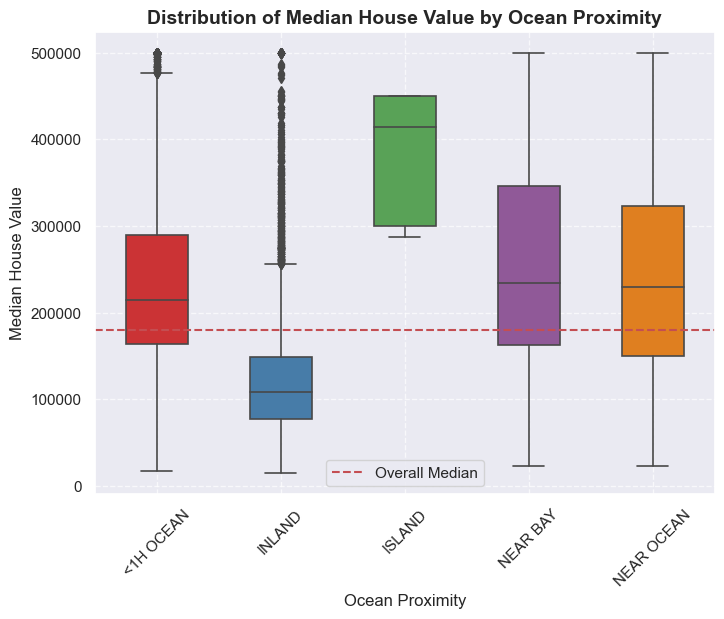

In [25]:
# Create a boxplot to visualize the distribution of 'median_house_value' across different 'ocean_proximity' categories

# Set the style of the plot
sns.set(style="darkgrid")

# Set the figure size for better readability
plt.figure(figsize=(8, 6))  

# Custom color palette for the boxplot
palette = sns.color_palette("Set1")

# Create the boxplot
sns.boxplot(data=housing, x='ocean_proximity', y='median_house_value', palette=palette, 
             linewidth=1.2, width=0.5)

# Add a title to the plot with a larger font size
plt.title('Distribution of Median House Value by Ocean Proximity', fontsize=14, weight='bold')

# Label the x and y axes with larger font size and a specific font weight
plt.xlabel('Ocean Proximity', fontsize=12)
plt.ylabel('Median House Value', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add a horizontal line at the median to enhance readability
plt.axhline(y=housing['median_house_value'].median(), color='r', linestyle='--', linewidth=1.5, label='Overall Median')

# Add a legend to explain the horizontal line
plt.legend()

# Display the plot
plt.show()


In [26]:
# Group the income
bin_edges = [0,3,6,9,12,np.inf]
bin_names =['Very Low', 'Low', 'Lower-Middle', 'Upper-Middle', 'High']
income_proximity['income_grp'] = pd.cut(x=income_proximity['median_income'], bins=bin_edges, labels=bin_names)
income_proximity.head()

,median_income,ocean_proximity,median_house_value,income_grp
0,8.3252,NEAR BAY,452600.0,Lower-Middle
1,8.3014,NEAR BAY,358500.0,Lower-Middle
2,7.2574,NEAR BAY,352100.0,Lower-Middle
3,5.6431,NEAR BAY,341300.0,Low
4,3.8462,NEAR BAY,342200.0,Low


/Users/meecee/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/zd/0bzshzyx5tx0n2wd8q88c7480000gn/T/ipykernel_3256/623505737.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 800x600 with 0 Axes>

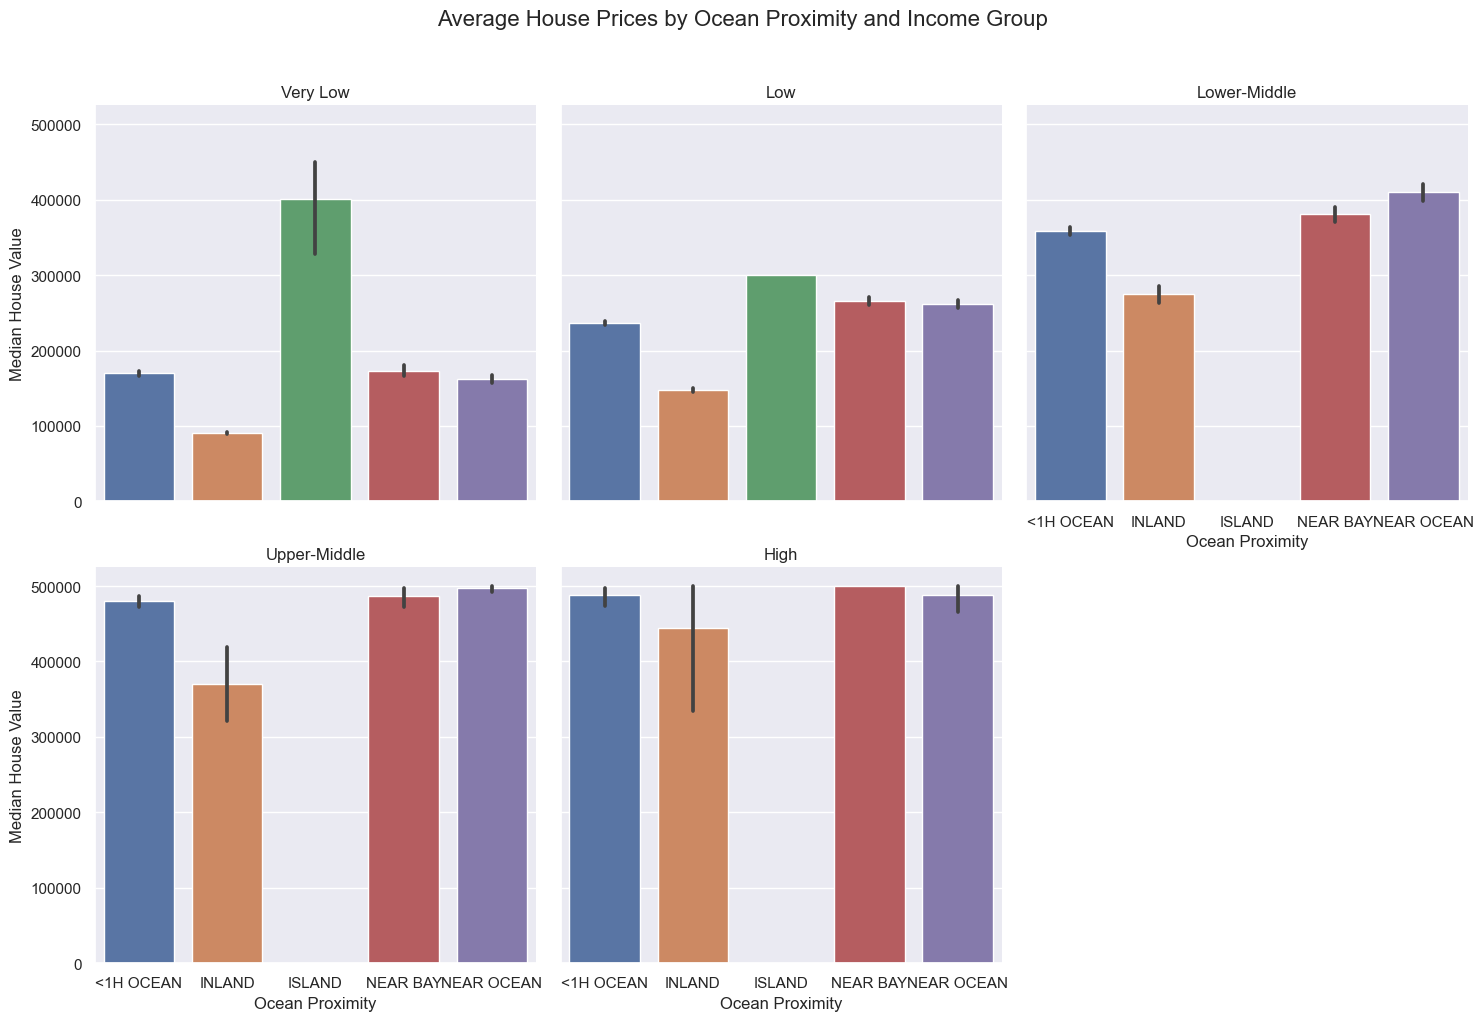

In [27]:
# Visualize the income group and median house value using a barplot 
# Because barplot is used in the visualization of categorical and numerical features

# Set the size of the entire plot
plt.figure(figsize=(8, 6))

# Create the categorical plot
g = sns.catplot(data=income_proximity, x='ocean_proximity', y='median_house_value', col='income_grp', kind='bar', col_wrap=3)

# Set the main title for the entire figure
g.fig.suptitle('Average House Prices by Ocean Proximity and Income Group', fontsize=16, y=1.02)

# Set labels for the x and y axes
g.set_axis_labels('Ocean Proximity', 'Median House Value')

# Set a title for each subplot
for ax in g.axes.flat:
    ax.set_title(ax.get_title().split(' = ')[-1])  # Extract and set subplot titles based on income group

# Adjust layout to make room for the title and labels
plt.tight_layout()
plt.show()

**Intuition from the analysis**:

The hypothesis holds true and it is supported by the analysis:

- Higher median income is associated with higher housing prices across all locations.
- Proximity to the ocean (including NEAR BAY, <1H OCEAN, NEAR OCEAN) is linked to higher median house values.
- The impact of median income on housing prices is indeed more pronounced in areas closer to the ocean. This is evident from the significant increases in median house values in higher income groups for properties near the coast compared to inland properties.

These findings confirm that both higher median income and proximity to the ocean contribute to higher housing prices, with a stronger effect observed in coastal areas.

**Hypothesis**:

Older housing units (higher housing_median_age) are associated with lower housing prices. As housing units age, they may experience depreciation due to wear and tear, outdated features, or increased maintenance needs which could lead to decrease in their prices.

In [28]:
# Create a DataFrame containing 'housing_median_age' and 'median_house_value' for analysis
age_df = housing[['housing_median_age', 'median_house_value']].copy()

# Display the first few rows of the DataFrame
age_df.head()

,housing_median_age,median_house_value
0,41.0,452600.0
1,21.0,358500.0
2,52.0,352100.0
3,52.0,341300.0
4,52.0,342200.0


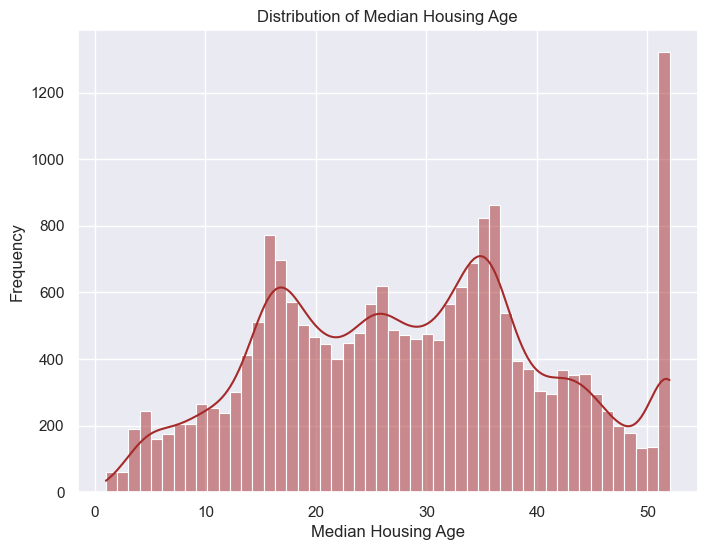

In [29]:
# create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Histplot of the housing_median_age column
sns.histplot(data=age_df, x='housing_median_age', bins=50, color='brown', kde=True)

# Add labels and title
ax.set_xlabel('Median Housing Age')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Median Housing Age')

# Display the plot
plt.show()

In [30]:
# Minimum house age
age_df.housing_median_age.min()

1.0

In [31]:
# Maximum house age
age_df.housing_median_age.max()

52.0

In [32]:
# Group the house age
# Define bin edges and labels
bins = [0, 3, 10, 25, 40, np.inf]
labels = ['Brand New', 'Fairly New', 'Moderately Old', 'Older', 'Very Old']

# Create a new column with the categorical data
age_df['housing_age_cat'] = pd.cut(age_df['housing_median_age'], bins=bins, labels=labels, right=True)

age_df.head()

,housing_median_age,median_house_value,housing_age_cat
0,41.0,452600.0,Very Old
1,21.0,358500.0,Moderately Old
2,52.0,352100.0,Very Old
3,52.0,341300.0,Very Old
4,52.0,342200.0,Very Old


In [33]:
# Group 'age_df' by 'housing_age_cat' and calculate the mean 'median_house_value' for each age category
new_age_df = age_df.groupby('housing_age_cat')[['median_house_value']].mean()

# Display the resulting DataFrame
new_age_df

,median_house_value
housing_age_cat,
Brand New,227473.427419
Fairly New,197928.264360
Moderately Old,196989.678374
Older,206151.080915
Very Old,228965.009025


In [34]:
# Add a new column 'housing_age_prop' to 'new_age_df' with values equal to 'median_house_value'
new_age_df['housing_age_prop'] = new_age_df['median_house_value']

In [35]:
# Calculate the proportion of each house age category

# Calculate the count of each category
category_counts = age_df['housing_age_cat'].value_counts()

# Calculate the percentage of each category
category_percentages = (category_counts / len(age_df)) * 100

# Display the percentage
print(category_percentages)

housing_age_cat
Older             39.399225
Moderately Old    34.210271
Very Old          18.788760
Fairly New         7.000969
Brand New          0.600775
Name: count, dtype: float64


In [36]:
# add housing_age_prc to the new_age_df dataframe
new_age_df['housing_age_prc'] = category_percentages
new_age_df

,median_house_value,housing_age_prop,housing_age_prc
housing_age_cat,,,
Brand New,227473.427419,227473.427419,0.600775
Fairly New,197928.264360,197928.264360,7.000969
Moderately Old,196989.678374,196989.678374,34.210271
Older,206151.080915,206151.080915,39.399225
Very Old,228965.009025,228965.009025,18.788760


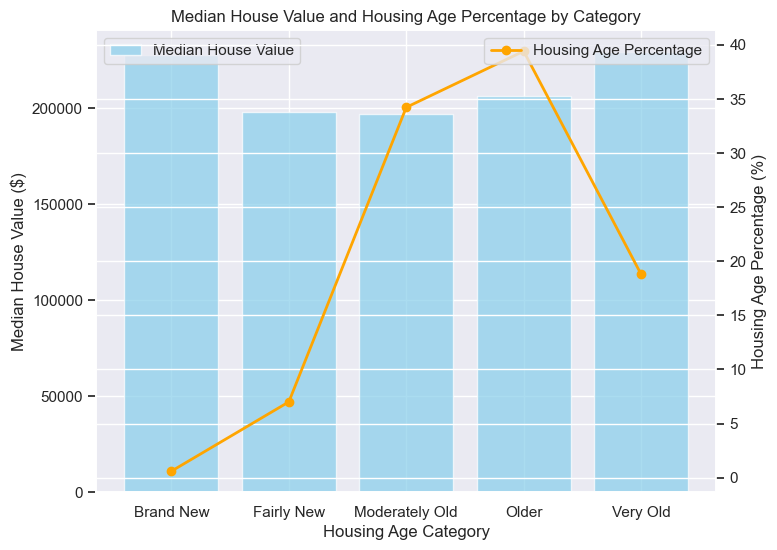

In [37]:
# create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create a bar plot for median house value
ax.bar(new_age_df.index, new_age_df['median_house_value'], color='skyblue', alpha=0.7, label='Median House Value')

# Create a secondary y-axis to plot the housing_age_prc
ax2 = plt.gca().twinx()
ax2.plot(new_age_df.index, new_age_df['housing_age_prc'], color='orange', marker='o', linestyle='-', linewidth=2, label='Housing Age Percentage')

# Add labels and title
ax.set_xlabel('Housing Age Category')
ax.set_ylabel('Median House Value ($)')
ax2.set_ylabel('Housing Age Percentage (%)')
ax.set_title('Median House Value and Housing Age Percentage by Category')

# Add legends
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

**Intuition from the analysis**
 
The hypothesis is rejected by the analysis:

- **High Median House Value for Brand New and Very Old Houses**: Brand new houses, as expected, command the highest prices, likely due to modern amenities and new construction. Interestingly, very old houses also have high median values, which might be due to historical value, architectural uniqueness, or location in established neighborhoods.

- **Lower Median House Value for Fairly New and Moderately Old Houses**: These categories have lower median values compared to brand new and very old houses, possibly indicating that houses in these age ranges do not possess the premium features of new construction or the historical value of very old homes.

- **Peak in Older Houses**: The highest percentage of houses falls into the older category, which might suggest that many properties are built in a time frame that is neither too recent nor too old. This age group has a slightly higher median value compared to fairly new and moderately old houses.

**Hypothesis**: 

Higher population size in an area is positively associated with higher housing prices. Larger populations create greater demand for housing, potentially leading to increased property values as the supply struggles to meet the demand

In [38]:
# Subset the dataframe for population and location
population_df = housing[['latitude', 'longitude', 'population', 'median_house_value']]
population_df.head()

,latitude,longitude,population,median_house_value
0,37.88,-122.23,322.0,452600.0
1,37.86,-122.22,2401.0,358500.0
2,37.85,-122.24,496.0,352100.0
3,37.85,-122.25,558.0,341300.0
4,37.85,-122.25,565.0,342200.0


In [39]:
# Summary statistics
population_df.describe()

,latitude,longitude,population,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,35.631861,-119.569704,1425.476744,206855.816909
std,2.135952,2.003532,1132.462122,115395.615874
min,32.540000,-124.350000,3.000000,14999.000000
25%,33.930000,-121.800000,787.000000,119600.000000
50%,34.260000,-118.490000,1166.000000,179700.000000
75%,37.710000,-118.010000,1725.000000,264725.000000
max,41.950000,-114.310000,35682.000000,500001.000000


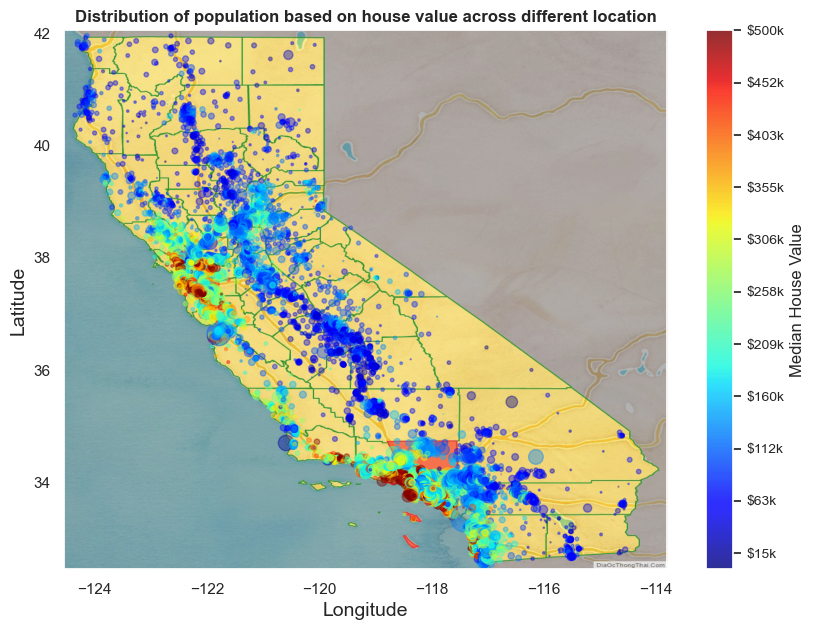

In [40]:
# Link to the image
# https://cdn.diaocthongthai.com/map/USA/map_location_2/usa__california__los_angeles.jpg

# Load the background image of California
california_img = mpimg.imread('ymap.png', format='png')

# Create the scatter plot with house prices
ax = housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7),
                  s=housing['population']/100, c='median_house_value', colorbar=False,
                  cmap=plt.get_cmap('jet'), alpha=0.4)

# Overlay the California map image
plt.imshow(california_img, alpha=0.8, extent=[-124.55, -113.80, 32.45, 42.05], cmap='jet')
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)

# Add title and axis labels
ax.set_title('Distribution of population based on house value across different location', fontsize=12, weight='bold' )
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Adjust the tick values to be evenly spaced
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk" % (round(v / 1000)) for v in tick_values], fontsize=10)
cbar.set_label('Median House Value', fontsize=12)

plt.grid()
plt.show()


**Intuition from the analysis**

This plot indicates a positive correlation between population density and housing prices in California. Areas with larger populations generally have higher housing prices, consistent with the hypothesis that greater demand due to higher populations drives up property values.

- **High Population Areas**: Regions like the San Francisco Bay (in the north) and Los Angeles (in the south) are characterized by larger circles, signifying higher population densities. These areas are also associated with higher house prices, as reflected by the red and orange colors on the map.

- **Moderate Population Areas**: Central California, including areas around Fresno, exhibits moderate population densities, indicated by medium-sized circles. House prices in these regions vary, predominantly falling within the blue to green range, representing mid-range values.

- **Low Population Areas**: Rural and less populated regions, such as far Northern California and the Eastern parts of the state, display smaller circles, denoting lower population densities. These areas are generally marked by blue shades on the map, indicating lower housing prices.

#### Identify and handle outliers in the dataset.

Outliers are data points that differ significantly from the rest of the dataset and can distort statistical measures and model performance.

**Using the IQR method to detect outliers**

To identify variables with outliers, we use the IQR method. IQR (Interquartile Range) is the range between the first (Q1) and third quartiles (Q3), values outside 1.5 * IQR above Q3 or below Q1 are considered outliers. Columns with more than 5% of their data as outliers will be treated to improve the modeling accuracy.

In [41]:
# Find columns with more than 5% outliers
outlier_columns = []
    
for column in housing.select_dtypes(include='number').columns:
    Q1 = housing[column].quantile(0.25)
    Q3 = housing[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    
    outliers = housing[(housing[column] < lower_threshold) | (housing[column] > upper_threshold )]
    
    if len(outliers) > 0.05 * len(housing):
        outlier_columns.append(column)
print("Columns with more than 5% outliers:", outlier_columns)

Columns with more than 5% outliers: ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_house_value']


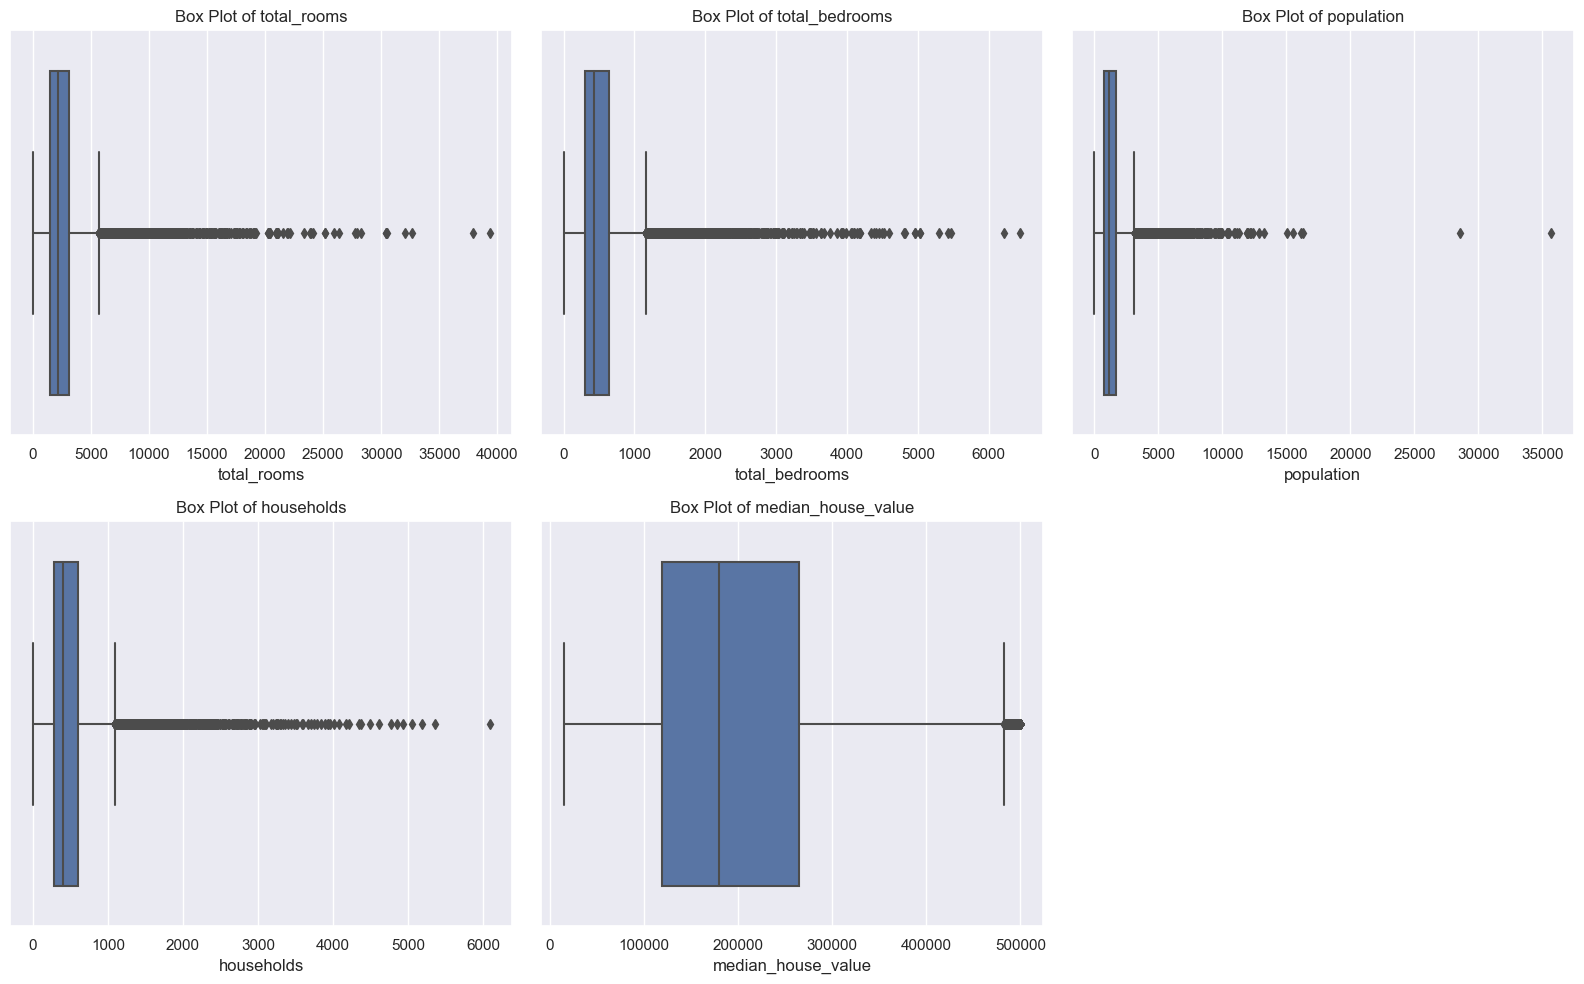

In [42]:
# Visualize the outliers

# Create a figure with subplots
plt.figure(figsize=(16, 10))

# Iterate through the columns and create a box plot for each
for i, column in enumerate(outlier_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=housing[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In the dataset, the target variables, along with `total_bedrooms`, `population`, and `households`, contain more than 5% outliers. The `total_rooms`, `population`, and `households` features exhibit significant skewness, so a log transformation will be applied to normalize their distributions. For the target variables, while the number of outliers is limited, they are concentrated in the upper range, which may indicate that the price is capped. To address this, a new column will be created to identify these values as censored prices.

In [43]:
# Columns to transform
columns_to_transform = ['total_rooms', 'population', 'households']

# Apply log transformation
# Using np.log1p for better numerical stability
for column in columns_to_transform:
    housing[f'{column}_log'] = np.log1p(housing[column])

# Display the first few rows to verify transformations
#housing.drop(columns_to_transform, axis=1, inplace=True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_log,population_log,households_log
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.781058,5.777652,4.844187
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,8.867850,7.784057,7.037906
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.291656,6.208590,5.181784
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,7.150701,6.326149,5.393628
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,7.395108,6.338594,5.560682


In [44]:
# Calculate the first quartile (Q1) and third quartile (Q3) of 'median_house_value'
Q1 = housing['median_house_value'].quantile(0.25)
Q3 = housing['median_house_value'].quantile(0.75)

# Compute the Interquartile Range (IQR) and determine the lower and upper thresholds for outliers
IQR = Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Create a new column 'censored_prices' indicating whether 'median_house_value' exceeds the upper threshold (outliers) with binary values
housing['censored_prices'] = (housing['median_house_value'] > upper_threshold).astype(int)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_log,population_log,households_log,censored_prices
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.781058,5.777652,4.844187,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,8.867850,7.784057,7.037906,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.291656,6.208590,5.181784,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,7.150701,6.326149,5.393628,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,7.395108,6.338594,5.560682,0


In [45]:
# Display the unique values in the 'censored_prices' column
housing.censored_prices.unique()

array([0, 1])

In [46]:
# check the correlation between the features and the target variable
correlation_matrix = housing.corr(numeric_only=True)
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
censored_prices       0.592825
total_rooms_log       0.159422
total_rooms           0.134153
housing_median_age    0.105623
households_log        0.073612
households            0.065843
total_bedrooms        0.049457
population_log       -0.021205
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

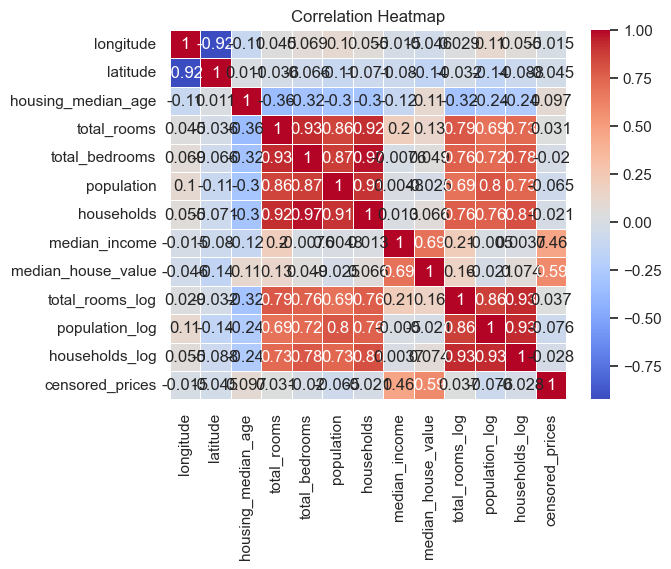

In [47]:
# Visualize the correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Feature Engineering

#### Create New Features

The `total_bedrooms`, `total_rooms`, and `population` are less informative without knowing the number of households in that district. They do not also correlate well with the `median_house_value`. Calculating the number of rooms per household and population per household could offer valuable insights. Similarly, comparing total number of bedrooms to the total number of rooms in a household can provide more context.

In [48]:
# Total rooms per household
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]

# Total bedrooms per room
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]

# Population per household
housing["population_per_household"]=housing["population"]/housing["households"]

In [49]:
correlation_matrix = housing.corr(numeric_only=True)
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
censored_prices             0.592825
total_rooms_log             0.159422
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households_log              0.073612
households                  0.065843
total_bedrooms              0.049457
population_log             -0.021205
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64

The `bedrooms_per_room` attribute is more strongly correlated with the median house value compared to the total number of rooms or the number of bedrooms. Typically, houses with a lower bedroom-to-room ratio tend to have higher prices. Similarly, the `rooms_per_household` attribute is a better predictor of house value than the total number of rooms in a district, as larger houses generally command higher prices.

In [50]:
# Remove total_rooms, total_bedrooms and population
housing.drop(columns_to_transform, axis=1, inplace=True)
housing.head()

,longitude,latitude,housing_median_age,total_bedrooms,median_income,median_house_value,ocean_proximity,total_rooms_log,population_log,households_log,censored_prices,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,129.0,8.3252,452600.0,NEAR BAY,6.781058,5.777652,4.844187,0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,1106.0,8.3014,358500.0,NEAR BAY,8.867850,7.784057,7.037906,0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,190.0,7.2574,352100.0,NEAR BAY,7.291656,6.208590,5.181784,0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,235.0,5.6431,341300.0,NEAR BAY,7.150701,6.326149,5.393628,0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,280.0,3.8462,342200.0,NEAR BAY,7.395108,6.338594,5.560682,0,6.281853,0.172096,2.181467


#### Encode categorical variables using one-hot or label encoding techniques.

Most machine learning algorithms need numerical input to function correctly. Encoding categorical features is crucial for ensuring that algorithms can effectively process and utilize categorical data, thereby enhancing model performance and interpretability. In this case, the `OrdinalEncoder` from `sklearn.preprocessing` will be used to encode the `ocean_proximity` feature. The EDA indicates that houses closer to the ocean are more desirable, and encoding this feature ordinally will allow the model to capture this natural ordering, which could be lost if the feature were treated as purely categorical.


In [51]:
# Define the order of categories
categories = [['<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'INLAND', 'ISLAND']]

# Initialize the OrdinalEncoder with the specified categories
encoder = OrdinalEncoder(categories=categories)

# Fit and transform the 'ocean_proximity' column
housing['ocean_proximity_ordinal'] = encoder.fit_transform(housing[['ocean_proximity']])

# Display the DataFrame to verify the changes
housing.head()

,longitude,latitude,housing_median_age,total_bedrooms,median_income,median_house_value,ocean_proximity,total_rooms_log,population_log,households_log,censored_prices,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_ordinal
0,-122.23,37.88,41.0,129.0,8.3252,452600.0,NEAR BAY,6.781058,5.777652,4.844187,0,6.984127,0.146591,2.555556,2.0
1,-122.22,37.86,21.0,1106.0,8.3014,358500.0,NEAR BAY,8.867850,7.784057,7.037906,0,6.238137,0.155797,2.109842,2.0
2,-122.24,37.85,52.0,190.0,7.2574,352100.0,NEAR BAY,7.291656,6.208590,5.181784,0,8.288136,0.129516,2.802260,2.0
3,-122.25,37.85,52.0,235.0,5.6431,341300.0,NEAR BAY,7.150701,6.326149,5.393628,0,5.817352,0.184458,2.547945,2.0
4,-122.25,37.85,52.0,280.0,3.8462,342200.0,NEAR BAY,7.395108,6.338594,5.560682,0,6.281853,0.172096,2.181467,2.0


#### Standardize numerical features

Imagine you’re comparing two features in your dataset: house prices and number of rooms. House prices are in the range of \\$15,000 to \\$500,000, while the number of rooms might range from 2 to 39,000. The numbers are on very different scales:

- House Prices: Large numbers (e.g. $100,000)
- Number of Rooms: Smaller numbers (e.g. 10)

If you use these features in a model without any adjustment, the model might pay more attention to the feature with the larger numbers (house prices) simply because the numbers are bigger. This isn’t what we want! Standardization helps to make sure that all features in your dataset have the same level of influence on the model.

Standardizing numerical features ensures that all features contribute equally to the model by transforming them to have a mean of 0 and a standard deviation of 1. This process improves convergence, enhances numerical stability, and enhances the performance of various machine learning algorithms. Without standardization, features with larger scales can disproportionately influence the model, leading to skewed results and reduced model performance. The reason for choosing standardization instead of normalization is that it less affected by extreme values (outliers) in the dataset.


In [52]:
# Drop the 'ocean_proximity' column from the 'housing' DataFrame
housing.drop('ocean_proximity', axis=1, inplace=True)

In [53]:
# Using Standardization because it isn't affected much by outliers

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features excluding the target variable
housing_scaled = scaler.fit_transform(housing.drop('median_house_value', axis=1))

# Convert the scaled data back to a DataFrame
housing_scaled_df = pd.DataFrame(housing_scaled, columns=housing.drop('median_house_value', axis=1).columns)

# Add the target variable back to the DataFrame
housing_scaled_df['median_house_value'] = housing['median_house_value'].values

# Display the DataFrame with scaled features and the target variable
housing_scaled_df.head()

,longitude,latitude,housing_median_age,total_bedrooms,median_income,total_rooms_log,population_log,households_log,censored_prices,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_ordinal,median_house_value
0,-1.327835,1.052548,0.982143,-0.972476,2.344766,-1.131133,-1.694943,-1.569395,-0.233943,0.628559,-1.029988,-0.049597,0.528828,452600.0
1,-1.322844,1.043185,-0.607019,1.357143,2.332238,1.651357,1.030337,1.449251,-0.233943,0.327041,-0.888897,-0.092512,0.528828,358500.0
2,-1.332827,1.038503,1.856182,-0.827024,1.782699,-0.450310,-1.109604,-1.104849,-0.233943,1.155620,-1.291686,-0.025843,0.528828,352100.0
3,-1.337818,1.038503,1.856182,-0.719723,0.932968,-0.638257,-0.949925,-0.813343,-0.233943,0.156966,-0.449613,-0.050329,0.528828,341300.0
4,-1.337818,1.038503,1.856182,-0.612423,-0.012881,-0.312370,-0.933021,-0.583469,-0.233943,0.344711,-0.639087,-0.085616,0.528828,342200.0


## Model Training and Evaluation

#### Split the dataset into training and testing sets.

Splitting the dataset into training and testing sets is crucial for developing robust and reliable machine learning models. It ensures that the model is trained on one subset of data and validated on another, helping to evaluate its ability to generalize to new housing data and make accurate price predictions.

- Training the Model: For the prediction of house prices, we need to teach the model how to estimate it based on various features . To do this, we will use a portion of the dataset called the training set. This subset of data is used to fit the model, meaning it learns the relationship between the features and the target variable (house price).

- Testing the Model: After training, we need to check how well the model performs on data it hasn't seen before. This is done using the testing set. The testing set allows us to measure how effectively the model predicts housing prices for new, unseen records, providing a more realistic assessment of its performance and also check if it generalizes well beyond the training examples.




In [54]:
# Features and target variable
X = housing_scaled_df.drop('median_house_value', axis=1)  # Features
y = housing_scaled_df['median_house_value']                # Target variable

# Split the dataset into training and testing sets
# random_state=42 ensures that the split is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Display the shapes of the resulting datasets
print("Training feature set shape:", X_train.shape)
print("Testing feature set shape:", X_test.shape)
print("Training target set shape:", y_train.shape)
print("Testing target set shape:", y_test.shape)

Training feature set shape: (16512, 13)
Testing feature set shape: (4128, 13)
Training target set shape: (16512,)
Testing target set shape: (4128,)


#### Selection of machine learning algorithms
The problem has been framed and data has been explored, visualized, and preprocessed. Now, it is time to select and train a machine learning model. California housing prices are influenced by various factors such as median income, number of rooms, house age, and geographic location, which may exhibit both linear and non-linear relationships with the target variable. Therefore, selecting appropriate algorithms requires understanding these relationships and the strengths and limitations of different models. 

Given that the model aims to predict a numerical value (price), it will be designed to address a regression problem. Various regression models, such as Linear Regression, Decision Tree, and Random Forest, will be trained and compared. The following provides the ground for choosing these machine learning algorithms for this regression task:

1. **Linear Regression**:
   - **Justification**: Linear regression is simple, interpretable, and efficient. It provides a good baseline for performance comparison (If the performance is satisfactory, it can be used; otherwise, more complex models can be considered). Given that many features in the dataset might have linear relationships with the target variable (house prices), it is a logical starting point. Additionally, the coefficients of the linear regression model offer direct insights into how each feature impacts house prices, which can be valuable for understanding market dynamics.

2. **Decision Tree Regressor**:
   - **Justification**: Decision trees can capture non-linear relationships and interactions between features. They are easy to interpret and visualize, providing a clear understanding of the decision-making process. Decision trees can also handle missing values (although the missing values in the dataset has been handled) and do not require feature scaling, making them flexible and easy to apply.

3. **Random Forest Regressor**:
   - **Justification**: Random forests is an ensemble method based on decision trees (reason for choosing it after Decision Tree). It combines multiple decision trees to improve performance and also mitigate overfitting (a common issue with decision trees) by averaging multiple decision trees trained on different subsets of the data. They generally provide better performance and robustness. Random forests are also less sensitive to outliers and noise in the data, and they can handle large datasets with many features effectively.

#### Train multiple models and evaluate their performance using appropriate metrics 

We will evaluate the model using the following metrics:
- Root Mean Squared Error (RMSE)
- R-Squared(R²)


**Reason for choosing Root Mean Squared Error (RMSE)**

The goal of this project is to estimate housing prices with high accuracy and minimize prediction errors compared to traditional methods. RMSE supports this by converting prediction errors into the same units as house prices, making it easier to assess prediction accuracy in financial terms. It helps identify models with significant errors, which is crucial for precise real estate pricing. Additionally, RMSE facilitates comparison between different models and helps diagnose issues like overfitting or underfitting. A lower RMSE signifies more accurate and practical predictions, which is essential for informed decision-making in the real estate market.

**Reason for Choosing R-squared (R²)**

R-squared (R²) is crucial for evaluating model performance as it measures the proportion of variance in the dependent variable, such as housing prices, explained by the model. Higher R² values indicate a better fit and make it easier to compare different models, simplifying the selection process. Unlike metrics like Mean Squared Error (MSE), R² is more intuitive because it represents the percentage of explained variance. This makes it a valuable tool for assessing model effectiveness and guiding refinements during model tuning and feature selection.

First, let's evaluate whether a Linear Regression model provides satisfactory results:

In [55]:
# Initialize the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

LinearRegression()

Let's try it out on the training set:

In [56]:
# Select the first 5 rows of the training data and corresponding labels
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]

# Use the linear regression model to make predictions on this subset of data
some_pred = lin_reg.predict(some_data)

# Print the predictions, rounded to 2 decimal places
print("Predictions:", np.round(some_pred, 2))

Predictions: [171540.73 274008.04 252916.27 130389.07 168594.68]


In [57]:
# Convert the training labels to a list and print it
list (some_labels)

[103000.0, 382100.0, 172600.0, 93400.0, 96500.0]

Let's use RMSE (Root Mean Squared Error) to judge the quality of our predictions:

In [58]:
# Evaluate the model using Root Mean Squared Error
y_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_pred, y_train)
lin_rmse = np.sqrt(lin_mse)
print("Linear Regression Training RMSE:", lin_rmse)

Linear Regression Training RMSE: 59698.36650045221


In [59]:
# Evaluate the model using R-squared
lin_r2 = r2_score(y_train, y_pred)
print("Linear Regression Training R²:", lin_r2)

Linear Regression Training R²: 0.7333966897880806


The performance metrics for the Linear Regression model reveal some significant insights:

**Root Mean Squared Error (RMSE)** error metric indicates that, on average, the model's predictions deviate from the actual median house values by approximately \$59,698. Given that most districts have median housing values ranging between \\$120,000 and \\$265,000, this prediction error represents a substantial portion of the price range. Such a high RMSE suggests that the model's predictions are not very accurate, which could imply that the model is underfitting the data.

**R-squared (R²)** value of 0.7334 means the model explains about 73.34% of the variance in housing prices. While this indicates some degree of explanatory power, the remaining 36.35% of variance is unexplained by the model, which reflects a notable gap in predictive accuracy. This suggests that there are other factors influencing house prices that the model is not capturing, or that the model may not be sophisticated enough to capture these factors.

Overall, the current model's performance suggests there is significant room for improvement. To address these issues, it is beneficial to explore more advanced modeling techniques to better capture the factors influencing housing prices

Let's explore a more robust model since we've only tested one so far. I'll use a Decision Tree Regressor, which can capture complex nonlinear relationships in the data.

In [60]:
# Initialize the model
tree_reg = DecisionTreeRegressor(random_state=42)

# Train the model
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [61]:
# Testing it out on the training set
y_pred = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, y_pred)
tree_rmse = np.sqrt(tree_mse)
print("Decision Tree Training RMSE:", tree_rmse)

Decision Tree Training RMSE: 0.0


In [62]:
# Evaluate the model using R-squared
tree_r2 = r2_score(y_train, y_pred)
print("Decision Tree Training R²:", tree_r2)

Decision Tree Training R²: 1.0


The RMSE value of 0.0 indicates that the Decision Tree Regressor has achieved a perfect fit on the training data. This means that the model’s predictions match the training data exactly, leading to zero error on this set. This is a sign of overfitting. The model has memorized the training data perfectly but may not generalize well to unseen data. Overfitting typically manifests as poor performance on test data, even if training performance is perfect.

An R² of 1.0 means that the Decision Tree Regressor explains 100% of the variance in the training data. This implies perfect fit to the training data.This perfect R² score further supports the idea of overfitting, as the model has essentially memorized the training data rather than learning general patterns.

The next step is to use cross-validation to assess the model’s performance across multiple subsets of the data. This helps in ensuring that the model performs well on different data splits and is less likely to overfit.

In [63]:
# Perform cross-validation and compute RMSE for the Decission Tree Regressor model
scores = cross_val_score(tree_reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
tree_rmse_scores = np.sqrt(-scores)

In [64]:
# Calculate mean and standard deviation of RMSE scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [62665.58449737 60845.63217859 61341.34199943 62887.73896737
 62209.97499685 58799.03521509 59932.1328043  60996.9354495
 63774.22717669 62389.7153667 ]
Mean: 61584.23186518792
Standard deviation: 1419.192926753925


In [65]:
# Perform cross-validation with R-squared scoring
r2_scores = cross_val_score(tree_reg, X_train, y_train, cv=10, scoring='r2')

# Calculate mean and standard deviation of R-squared scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean R-squared:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(r2_scores)

Scores: [0.70671984 0.73519878 0.71819719 0.68582662 0.71016959 0.74535704
 0.72303896 0.71649836 0.70050439 0.71604781]
Mean R-squared: 0.7157558591791481
Standard deviation: 0.015984741808739402


Here is an actual assessment of the decision tree's performance, and it turns out to be worse than the previous linear regression model. The prediction error is \\$61,584, which is still relatively high, with a standard deviation of \\$1,419 meaning the error could vary by as much as \\$1,419 more or less. This suggests that the model is likely overfitting the training data, as it performs inconsistently across different subsets of the data and also not performing very well in terms of predictive accuracy.

The Decision Tree Regressor, with a mean R-squared of 71.58%, shows that it performs reasonably well on different subsets of the data. This represents an improvement over the training R-squared of 1.0, indicating better generalization to new data while still showing room for improvement. The cross-validated R-squared provides a more realistic assessment of the model’s performance on unseen data, reflecting a solid ability to capture variance in housing prices and avoid overfitting.





Let's assess the scores of the linear regression model again using K-Fold Cross-Validation

In [66]:
# Perform cross-validation and compute RMSE for the linear regression model
lin_scores = cross_val_score(lin_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

# Display the RMSE scores
display_scores(lin_rmse_scores)

Scores: [58699.69074054 60211.10094822 60599.76572932 58349.01434533
 60644.18808766 62204.80077502 58756.49685467 60734.17412621
 61799.64178647 60349.29574872]
Mean R-squared: 60234.816914215706
Standard deviation: 1224.4021014394996


In [67]:
# Perform cross-validation with R-squared scoring
lin_r2_scores = cross_val_score(lin_reg, X_train, y_train, cv=10, scoring='r2')

# Calculate mean and standard deviation of R-squared scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean R-squared:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_r2_scores)

Scores: [0.74266663 0.74069296 0.72496963 0.72953911 0.72457569 0.7150038
 0.73379819 0.71893562 0.71876332 0.73431708]
Mean R-squared: 0.7283262029129639
Standard deviation: 0.008990772824671974


The Linear Regression model is more stable and performs similarly to the Decision Tree model, which shows signs of overfitting (It's clear now that the decision tree model is overfitting and performs worse than our linear regression model). 

Let’s try one final model: the RandomForestRegressor.

In [68]:
# Initialize and train the RandomForestRegressor on the training data
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [69]:
# Predict on the training set and compute the RMSE
y_pred = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, y_pred)
forest_rmse = np.sqrt(forest_mse)
print("Random Forest Training RMSE:", forest_rmse)

Random Forest Training RMSE: 16036.93333646904


In [70]:
# Evaluate the model using R-squared
forest_r2 = r2_score(y_train, y_pred)
print("Random Forest Training R²:", forest_r2)

Random Forest Training R²: 0.9807609647905554


The RMSE of \$16,036.93 is significantly low indicating that the Random Forest model performs much better in terms of prediction accuracy on the training data compared to the Decision Tree and Linear Regression models. The R² value of 98.08%, which is very high suggests that the model fits the training data extremely well. The very low training RMSE and high R² suggest that the Random Forest model might be overfitting the training data.


Let's perform cross-validation with the Random Forest model to assess its performance across different data splits and get a better estimate of its generalization performance.

In [71]:
# Perform cross-validation for the RandomForestRegressor
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)

# Compute the RMSE score
forest_rmse_scores = np.sqrt(-forest_scores)

# Display the RMSE scores
display_scores(forest_rmse_scores)

Scores: [42546.86697605 44438.5739571  44131.46722329 43557.10310082
 45265.97356999 41580.48541718 42402.9070077  44289.10754671
 44038.30070211 43458.72948104]
Mean R-squared: 43570.95149819714
Standard deviation: 1051.7617430179057


In [72]:
# Perform cross-validation with R-squared scoring
forest_r2_scores = cross_val_score(forest_reg, X_train, y_train, cv=10, scoring='r2')

# Calculate mean and standard deviation of R-squared scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean R-squared:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(forest_r2_scores)

Scores: [0.8648053  0.8587523  0.85414024 0.84928538 0.84654974 0.87265838
 0.86135938 0.8505371  0.85718917 0.8622241 ]
Mean R-squared: 0.8577501077796462
Standard deviation: 0.0075402472697378


This performance is generally better compared to the Linear Regression model's mean RMSE (60,234.82) and the Decision Tree's performance, which had an RMSE of 0 on the training set but showed significant variation with cross-validation. The R² value of 85.78% is significantly higher than the R² values obtained from the Linear Regression model on the same dataset, suggesting the Random Forest model has better explanatory power.


While the Random Forest model demonstrates excellent performance on the training set, its effectiveness drops when evaluated on different data subsets. This indicates that the model may have overfitted to the training data and might not generalize well to unseen data. The next step is to optimize the model to mitigate this issue.

#### Hyperparameter tuning to optimize the model's performance.

Since the Random Forest model has proven to be the best performing model, we will now focus on hyperparameter tuning to enhance its ability to generalize to new data and maintain consistent performance across different datasets. Instead of manually testing various hyperparameters, we’ll use Grid Search to automate this process. Grid Search systematically explores specified hyperparameter values to find the optimal combination.

In [73]:
# Define parameter grid for hyperparameter tuning
param_grid = [
    {'n_estimators': [50, 100, 200], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

# Initialize GridSearchCV
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [50, 100, 200]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [74]:
# Display the best estimator found by GridSearchCV
print("Best Estimator:", grid_search.best_estimator_)

Best Estimator: RandomForestRegressor(max_features=6, n_estimators=200, random_state=42)


This tells us we can get the optimal performance of the model by setting the max_features to 6 and n_estimators to 200.

In [75]:
# Print the RMSE, R^2, and corresponding hyperparameters for each configuration in the GridSearchCV results
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    rmse = np.sqrt(-mean_score)
    
    # Create a model with the current parameters
    model = RandomForestRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict and calculate R-squared score
    predictions = cross_val_predict(model, X_train, y_train, cv=5)
    r2 = r2_score(y_train, predictions)
    
    print(f"RMSE: {rmse:.2f}, R^2: {r2:.4f}, Params: {params}")

RMSE: 45335.56, R^2: 0.8462, Params: {'max_features': 2, 'n_estimators': 50}
RMSE: 44934.26, R^2: 0.8490, Params: {'max_features': 2, 'n_estimators': 100}
RMSE: 44762.45, R^2: 0.8501, Params: {'max_features': 2, 'n_estimators': 200}
RMSE: 43566.95, R^2: 0.8580, Params: {'max_features': 4, 'n_estimators': 50}
RMSE: 43210.75, R^2: 0.8603, Params: {'max_features': 4, 'n_estimators': 100}
RMSE: 43095.57, R^2: 0.8611, Params: {'max_features': 4, 'n_estimators': 200}
RMSE: 43419.73, R^2: 0.8590, Params: {'max_features': 6, 'n_estimators': 50}
RMSE: 43111.69, R^2: 0.8610, Params: {'max_features': 6, 'n_estimators': 100}
RMSE: 42939.65, R^2: 0.8621, Params: {'max_features': 6, 'n_estimators': 200}
RMSE: 43655.17, R^2: 0.8574, Params: {'max_features': 8, 'n_estimators': 50}
RMSE: 43403.42, R^2: 0.8591, Params: {'max_features': 8, 'n_estimators': 100}
RMSE: 43246.61, R^2: 0.8601, Params: {'max_features': 8, 'n_estimators': 200}
RMSE: 54342.19, R^2: 0.7791, Params: {'bootstrap': False, 'max_featu

The combination of max_features=6 and n_estimators=200 produces the lowest RMSE of \$42,939.65 and highest R² of 86.21%, indicating the best performance among the tested configurations.

#### Evaluate the best-performing model on the testing set.

We can now assess the final model's performance on the test set

In [76]:
# Use the best estimator from grid search to make predictions on the test set
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test)


In [77]:
# Calculate and print the final RMSE on the test set
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("Final  RMSE Score:", final_rmse)

Final  RMSE Score: 41961.41398174688


In [78]:
# Calculate and print the final R2 on the test set
final_r2 = r2_score(y_test, final_predictions)
print("Final  R² Score:", forest_r2)

Final  R² Score: 0.9807609647905554


The RandomForestRegressor with the best-found parameters (max_features=6 and n_estimators=200) provides a relatively low RMSE and high R2 score, indicating strong performance and accuracy in predicting housing prices and also a good fit to the test set. This suggests that the model is a good fit for the data and generalizes well to unseen instances.

## Model Interpretation and Reporting


**Model Performance**


The best-performing model, a Random Forest Regressor, achieved an impressive R² score of 0.981 and an RMSE of approximately \\$41,961, demonstrating its strong capability in accurately predicting California housing prices. This high R² score indicates that the model effectively captures the complex relationships between housing prices and various influencing factors, such as location, house age, number of bedrooms, proximity to ocean, and income. Given the significant variability in California's real estate market, these results highlight the model's effectiveness in addressing the problem of inaccurate housing price estimates. By providing precise and reliable predictions, the model offers valuable insights for investors, city planners, and potential homeowners, thereby reducing financial risks and improving decision-making in a dynamic and high-stakes market.

**Importance of Critical Features**

Feature importance helps us to understand which features are driving the predictions, that is, it indicates how much each feature contributes to the model's predictions.To understand the importance of each feature in the RandomForestRegressor model, how each feature contributes to predicting the median house values needs to be considered.

In Random Forest models, feature importance can be done using feature importance scores. These scores indicate how much each feature helps reduce prediction error. The RandomForest model provides a measure of the importance of each feature based on how much it contributes to reducing the variance in the target variable (house prices). Features with higher importance scores have a greater impact on the predictions.


In [79]:
# Get feature importances
importances = final_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
feature_importance_df.reset_index(drop=True)

,Feature,Importance
0,median_income,0.266920
1,censored_prices,0.261114
2,ocean_proximity_ordinal,0.140086
3,population_per_household,0.071577
4,longitude,0.054728
5,bedrooms_per_room,0.052901
6,latitude,0.050231
7,rooms_per_household,0.029947
8,housing_median_age,0.026171
9,total_rooms_log,0.012058


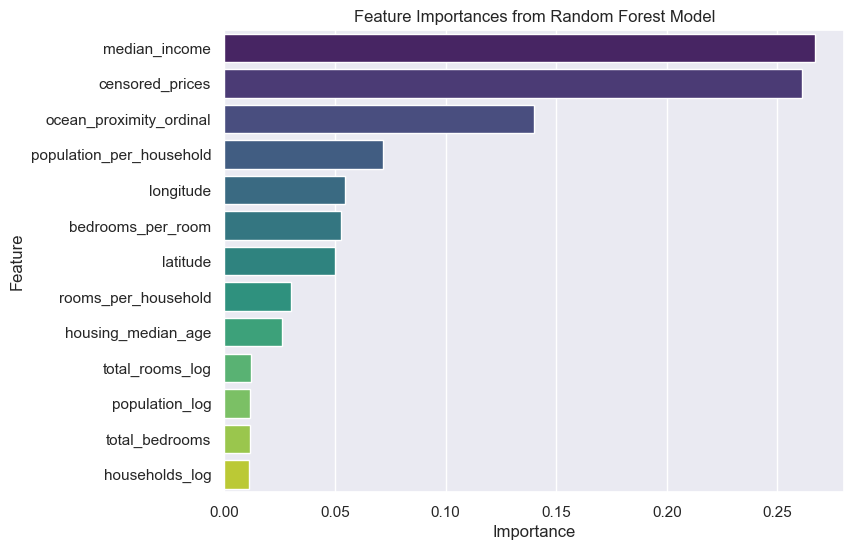

In [80]:
# Plot feature importances
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The feature importance analysis reveals that median income, censored prices, and ocean proximity are the primary drivers in the model’s predictions of housing prices in California. These factors directly correlate with economic status, desirability of location, and demand. Geographical factors like latitude and longitude, while influential, are secondary, reflecting regional differences in pricing within the state. The other variables, though still relevant, contribute less significantly to the prediction model. 

**Prediction vs. Actual Values**

This scatter plot helps visualize how well the model’s predictions match the actual values in the test set.

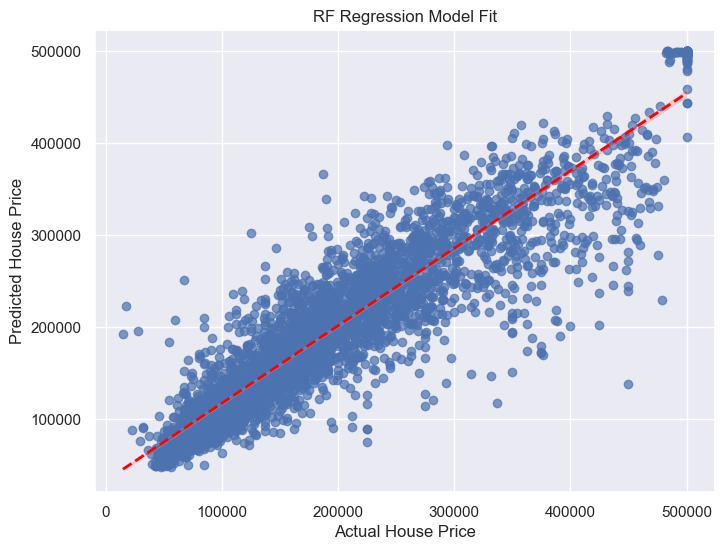

In [81]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=final_predictions, scatter_kws={'alpha':0.7}, line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 2})
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('RF Regression Model Fit')
plt.show()

Most of the points are clustered around the red dashed line, indicating that the model’s predictions are reasonably close to the actual values for many instances. Some points are spread farther from the line, particularly in the higher price range, suggesting the model occasionally underestimates certain house prices. This pattern highlight instances where the model struggles to capture the full complexity of the factors influencing these house prices.

Overall, the visualization shows that the Random Forest model performs reasonably well in predicting house prices, as most points align closely with the red line. Nonetheless, there are notable deviations from actual values, particularly for higher-priced properties.

## Conclusion

This project successfully developed a predictive model for California house prices using machine learning. The Random Forest Regressor emerged as the best model, offering a balance between accuracy, computational efficiency, and interpretability. 

Key findings include:

- Median Income is the most significant factor in predicting house prices, underscoring the importance of economic status.
- Ocean Proximity and Censored Prices are also critical, reflecting the impact of location and price ceilings on property values.
- The model performs well overall, but there is room for improvement in predicting high-value homes.

These insights are valuable for real estate stakeholders, providing a data-driven approach to understanding and predicting housing prices in California.

